/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:60: UserWarning: loadtxt: Empty input file: "esn_dif_minstable_r4_x0.1_d1000.csv"


0
0
[]


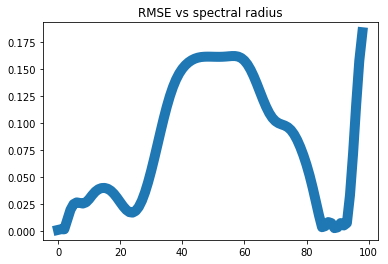

1
[]


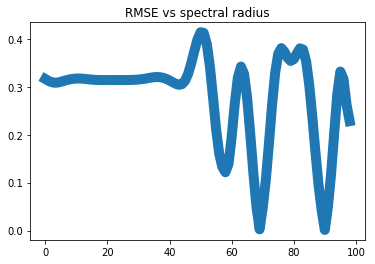

2
[]


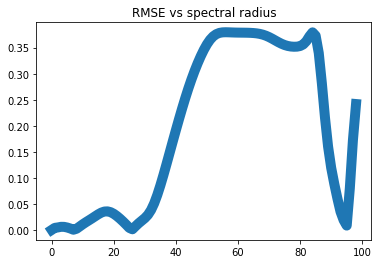

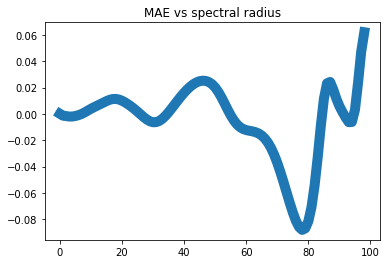

3
[]


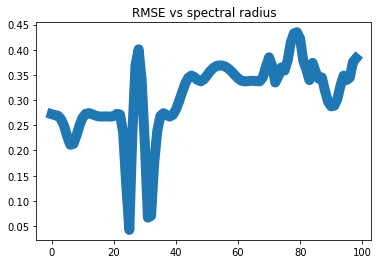

4
[]


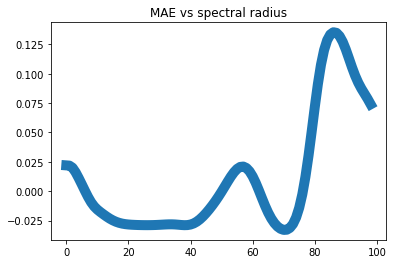

5
[]


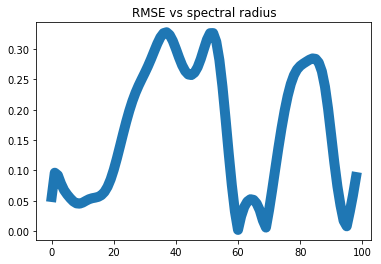

6
[]


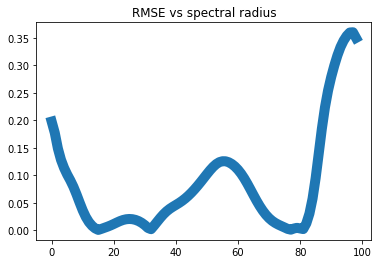

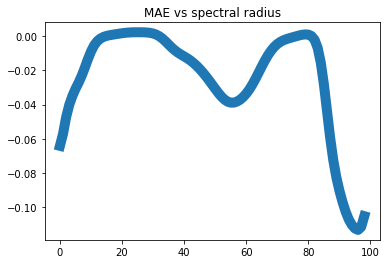

7
[]


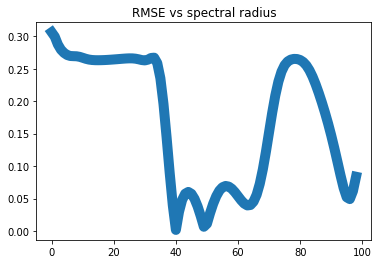

8
[]


9
[]


10
[]


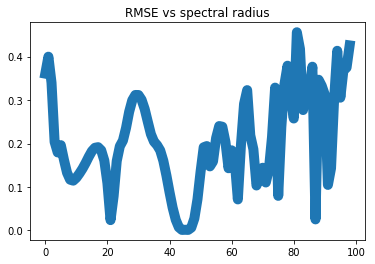

11
[]


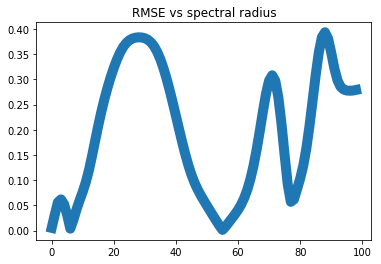

12
[]


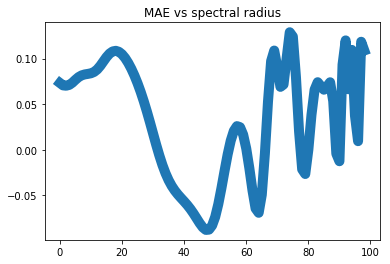

13
[]


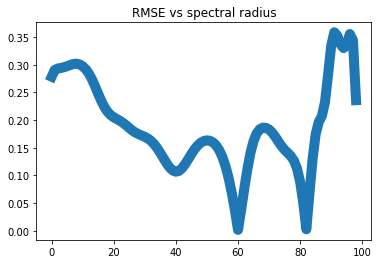

14
[]


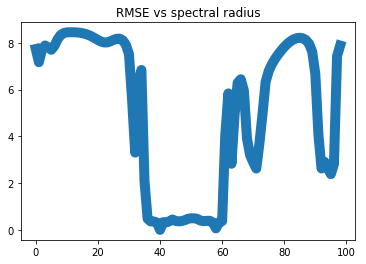

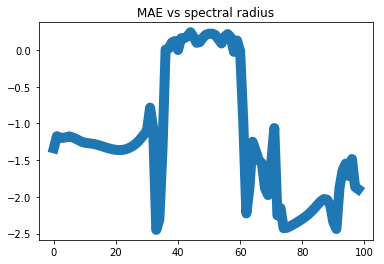

15
[]


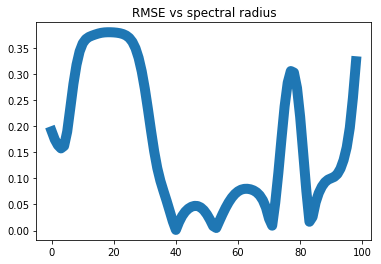

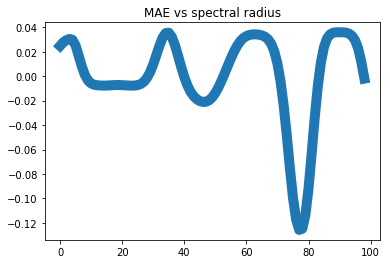

16
[]


17
[]


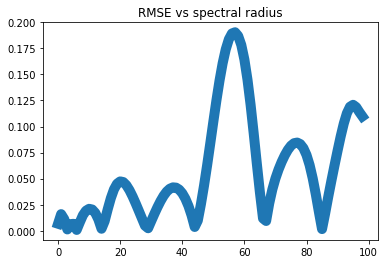

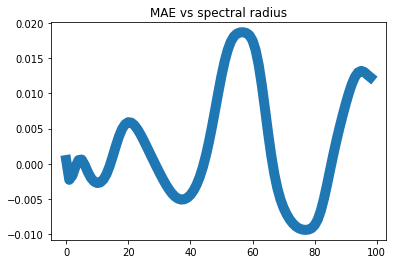

18
[]


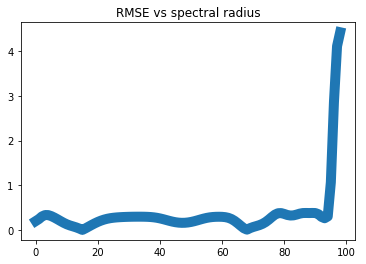

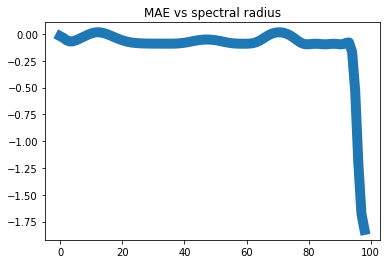

19
[]


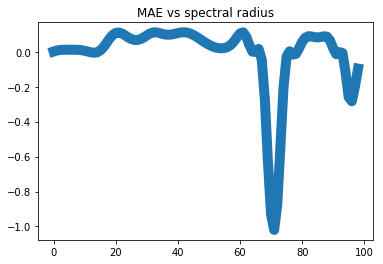

20
[]


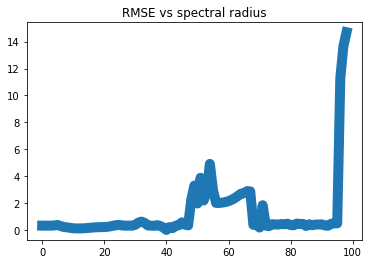

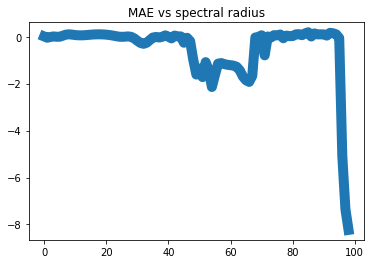

21
[]


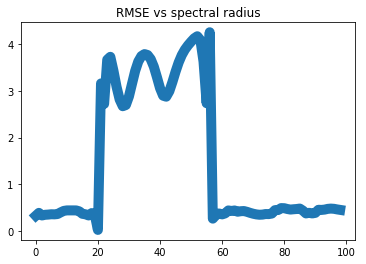

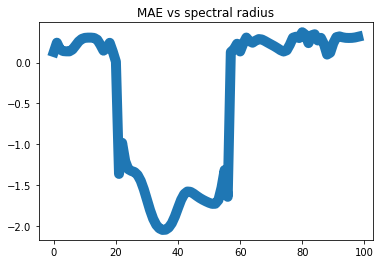

22
[]


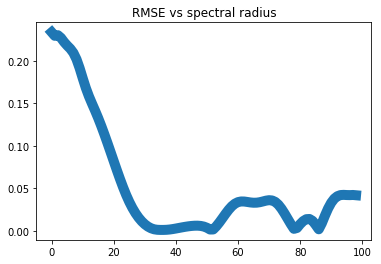

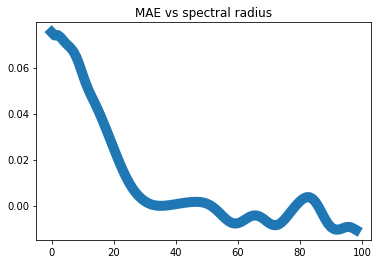

23
[]


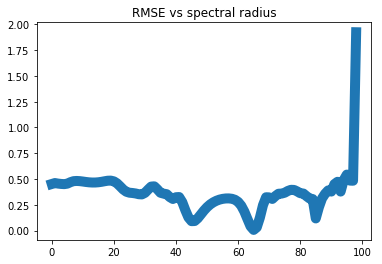

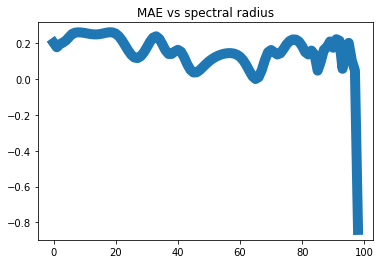

24
[]


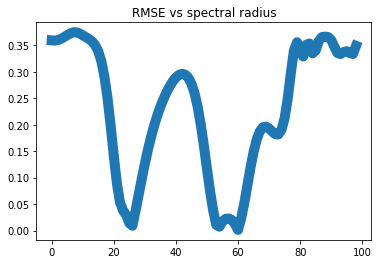

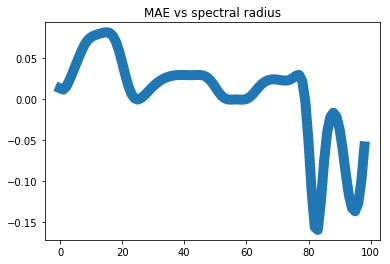

25
[]


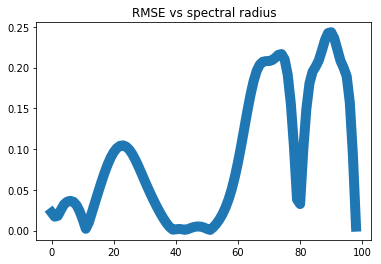

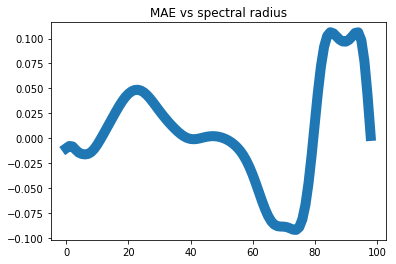

26
[]


27
[]


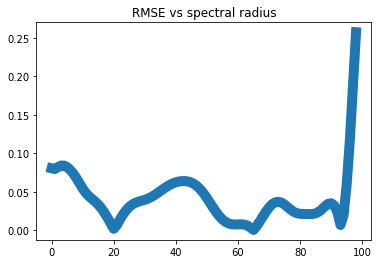

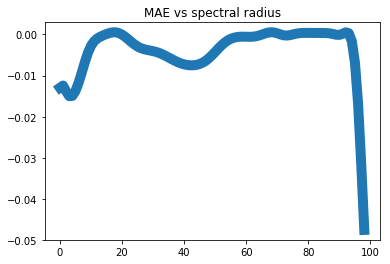

28
[]


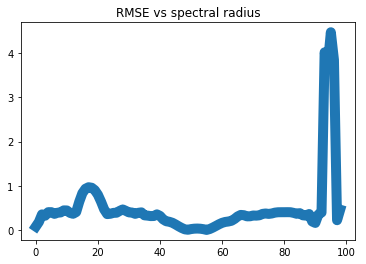

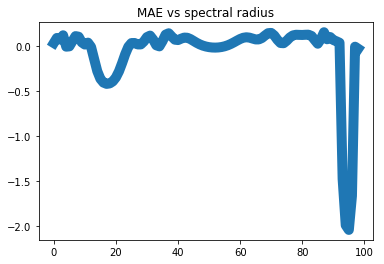

29
[]


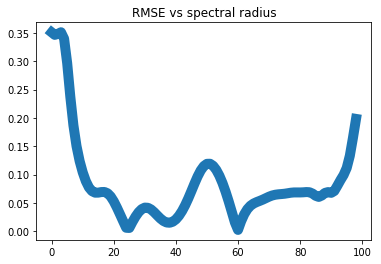

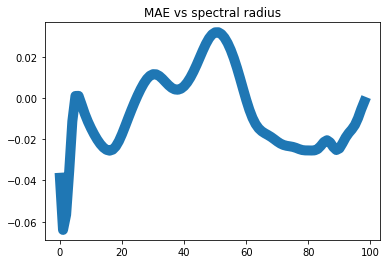

30
[]


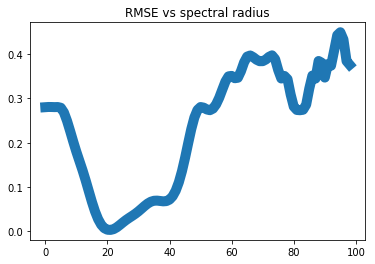

31
[]


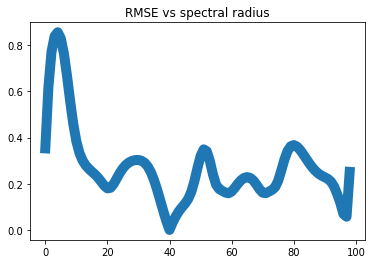

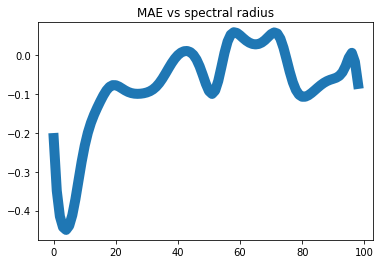

32
[]


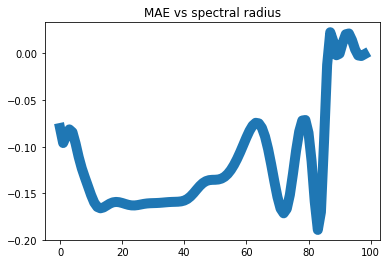

33
[]


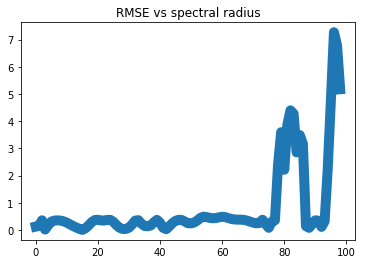

34
[]


35
[]


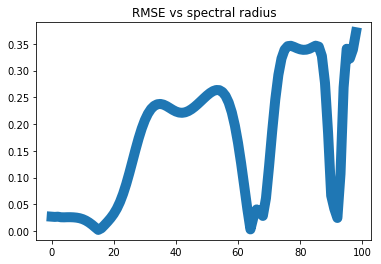

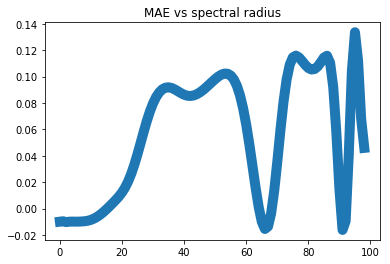

36
[]


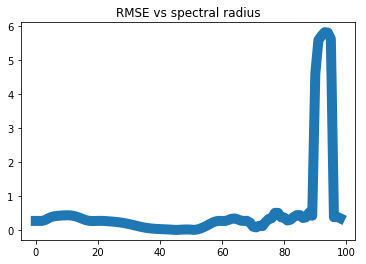

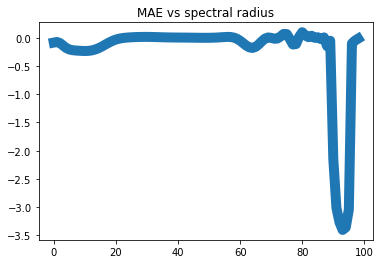

37
[]


38
[]


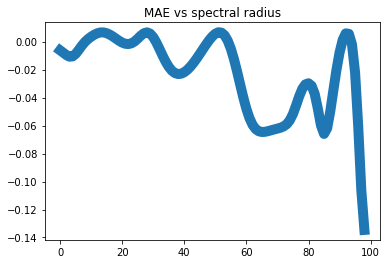

39
[]


40
[]


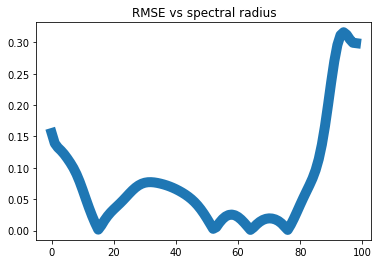

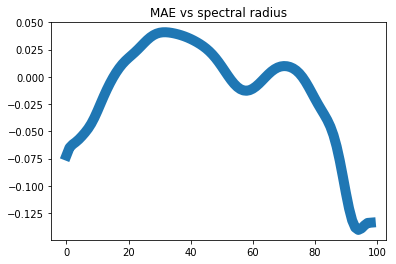

41
[]


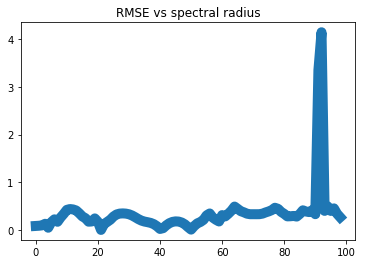

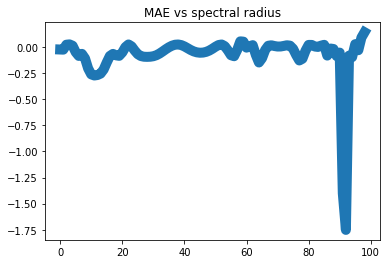

42
[]


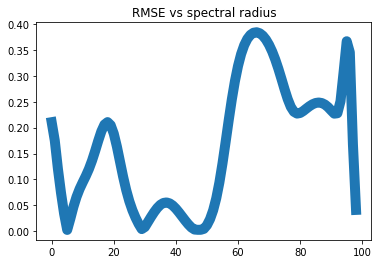

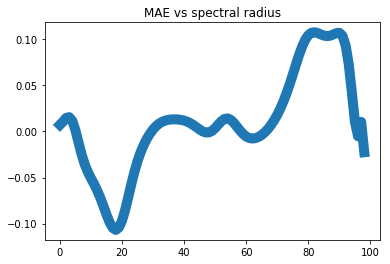

43
[]


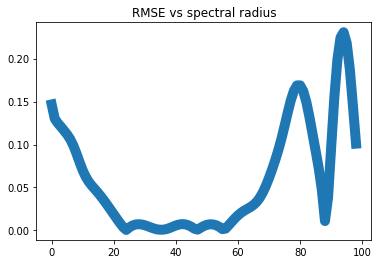

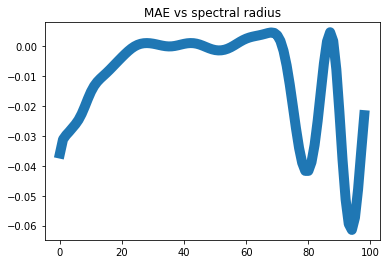

44
[]


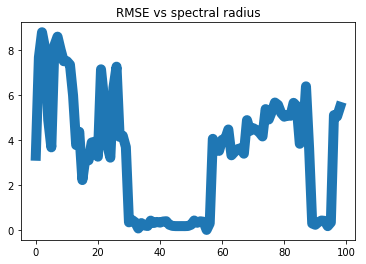

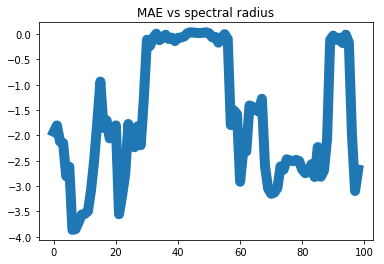

45
[]


46
[]


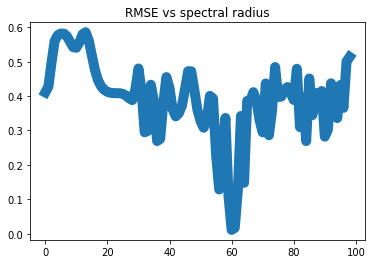

47
[]


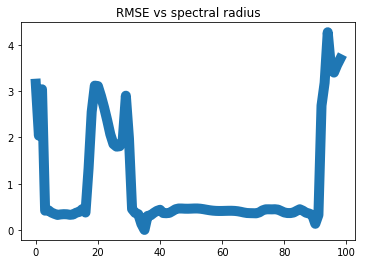

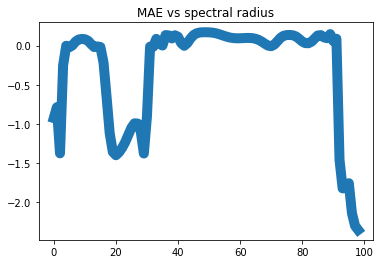

48
[]


49
[]


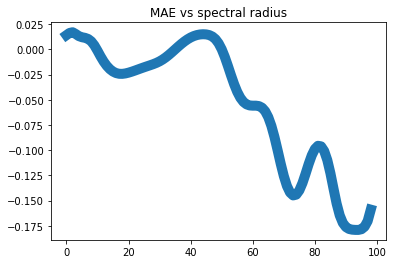

50
[]


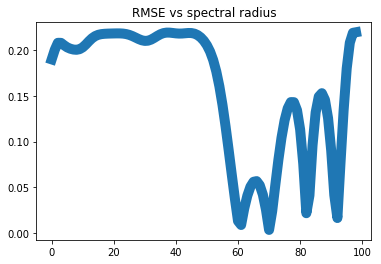

51
[]


52
[]


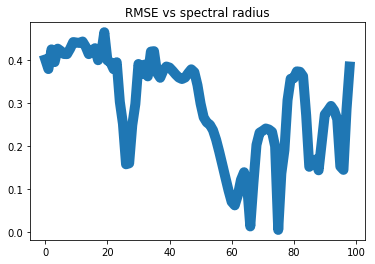

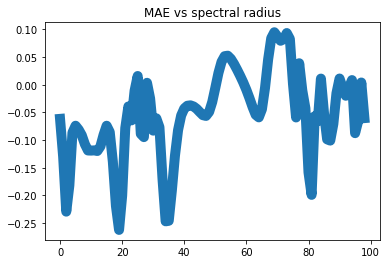

53
[]


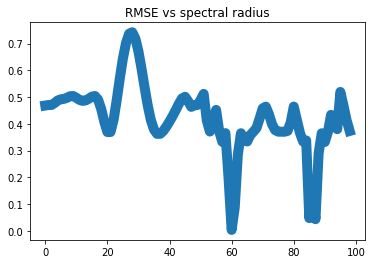

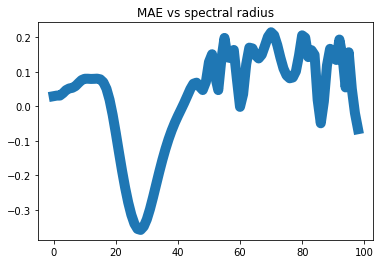

54
[]


55
[]


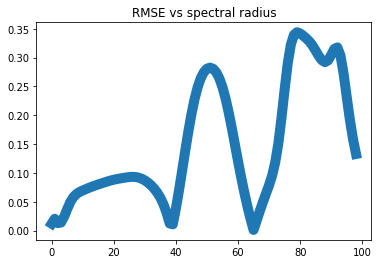

56
[]


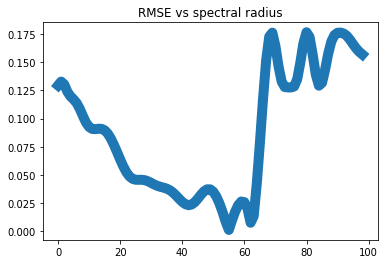

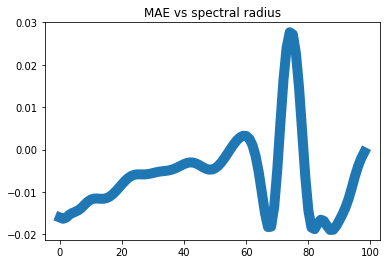

57
[]


58
[]


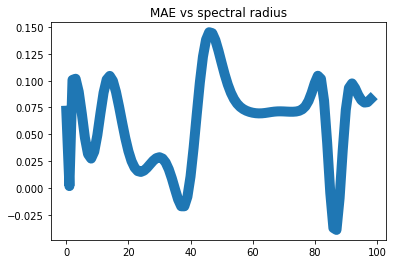

59
[]


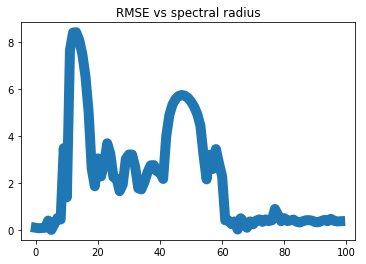

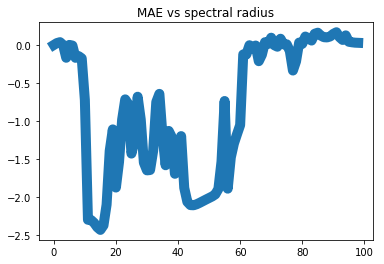

60
[]


61
[]


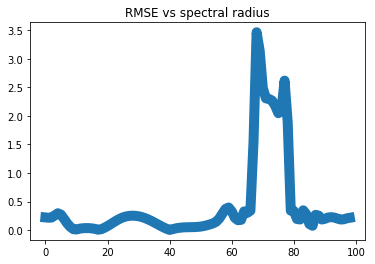

62
[]


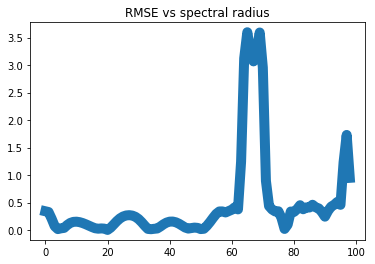

63
[]


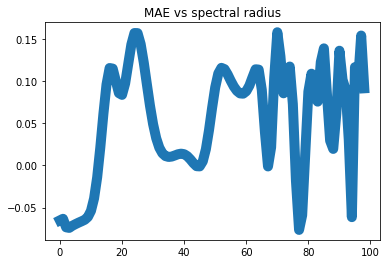

64
[]


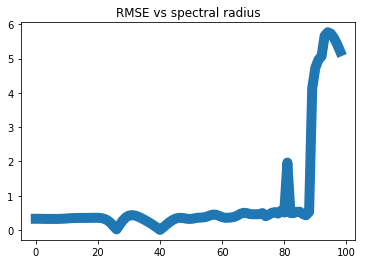

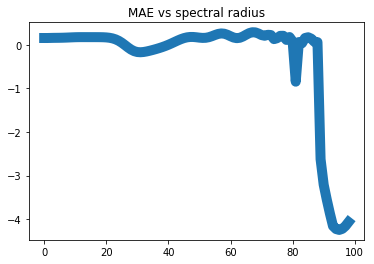

65
[]


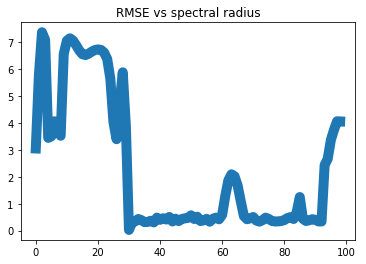

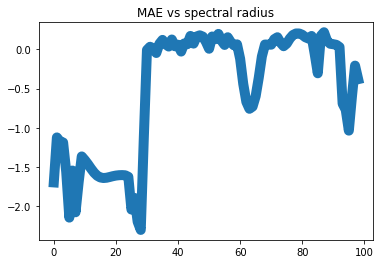

66
[]


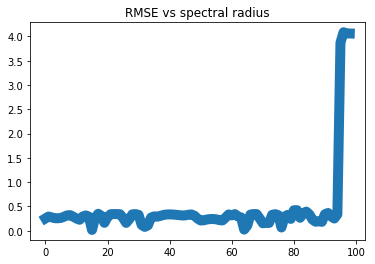

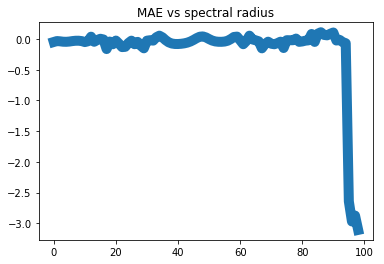

67
[]


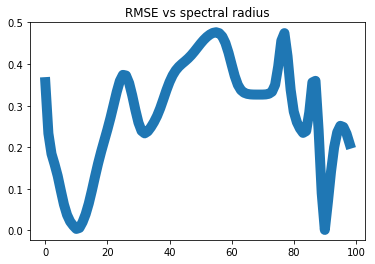

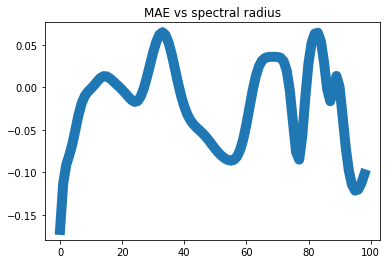

68
[]


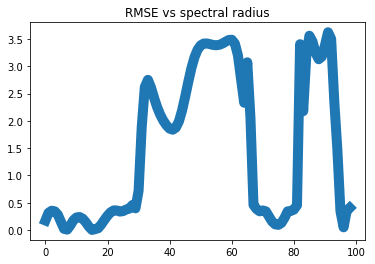

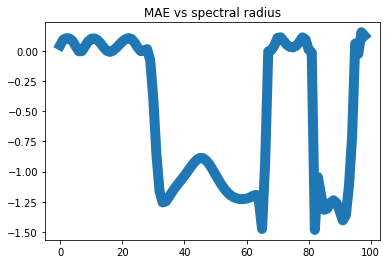

69
[]


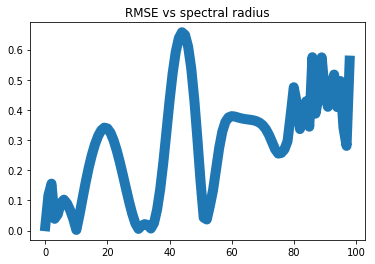

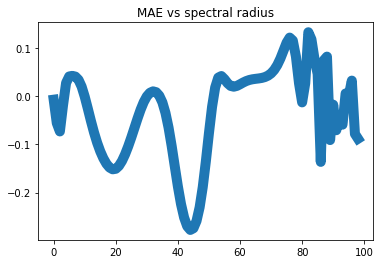

70
[]


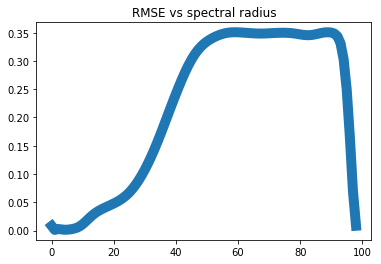

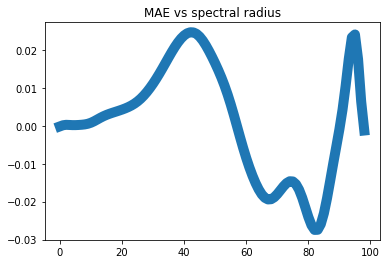

71
[]


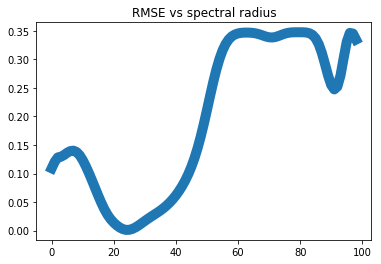

72
[]


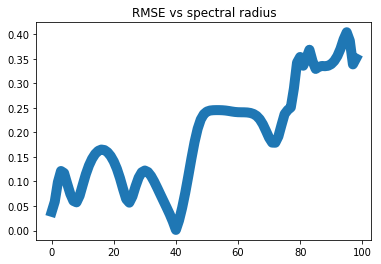

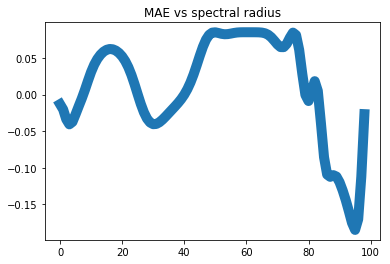

73
[]


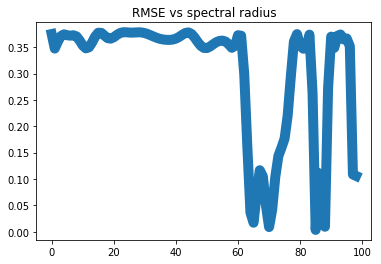

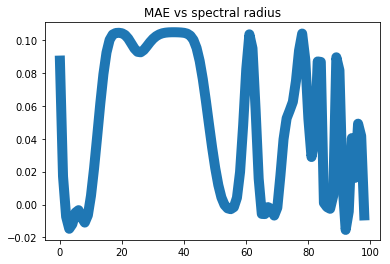

74
[]


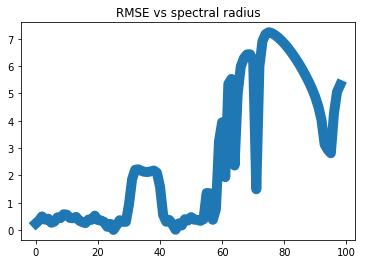

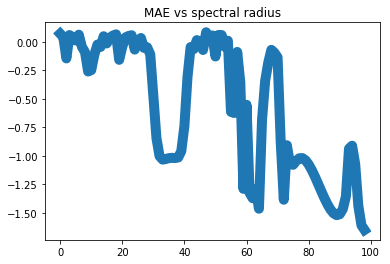

75
[]


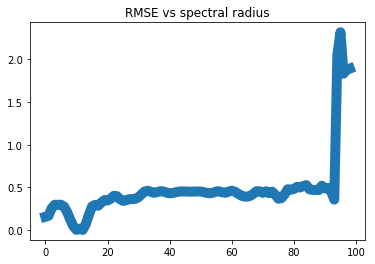

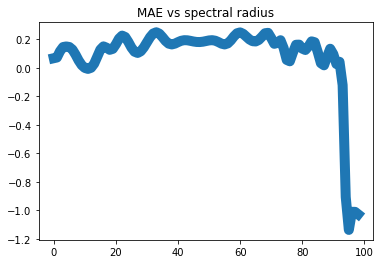

76
[]


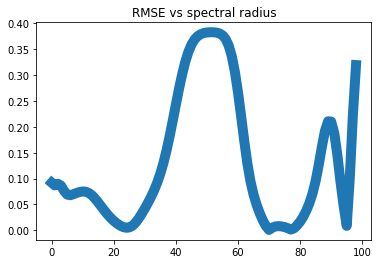

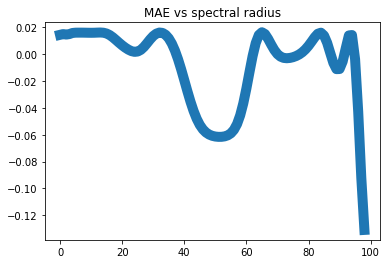

77
[]


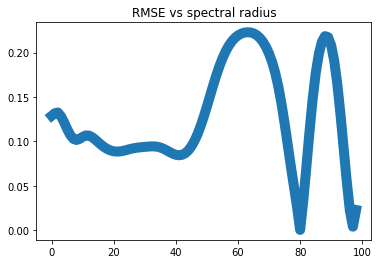

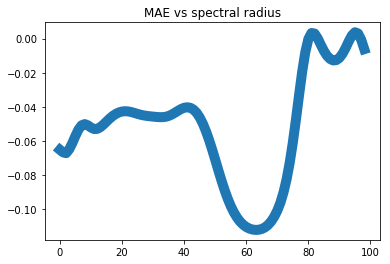

78
[]


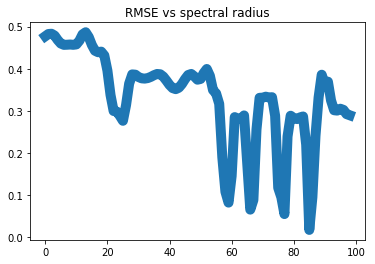

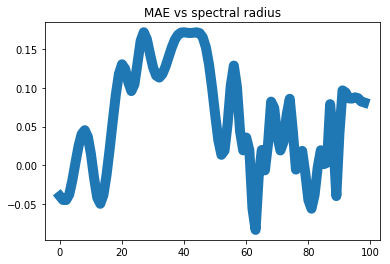

79
[]


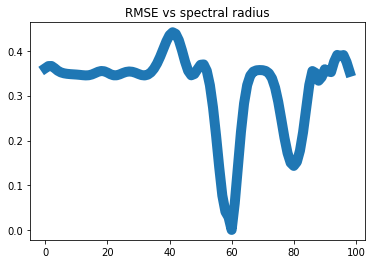

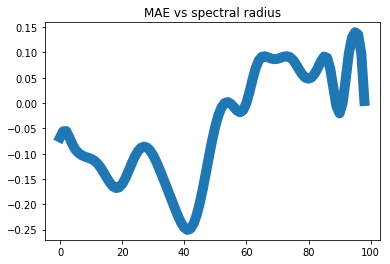

80
[]


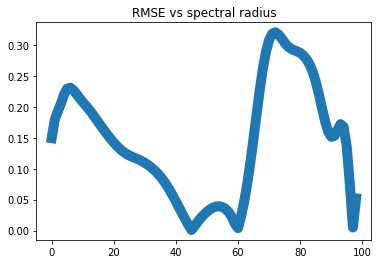

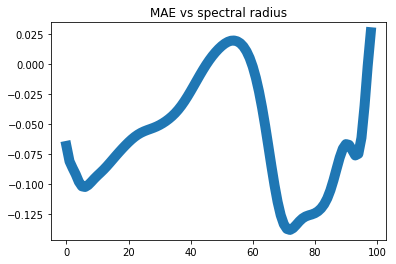

81
[]


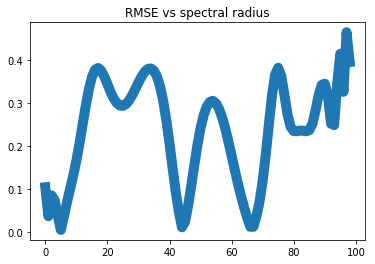

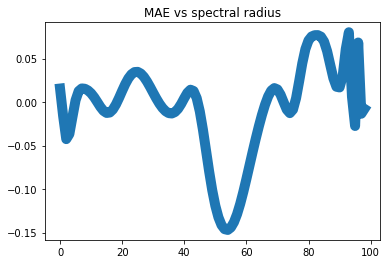

82
[]


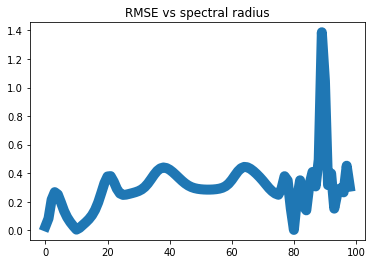

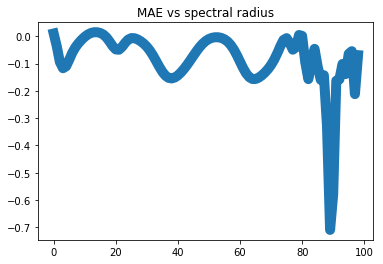

83
[]


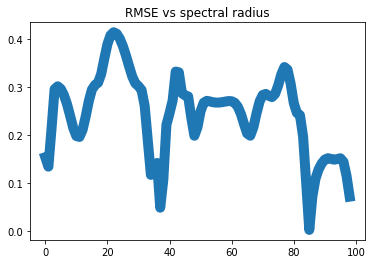

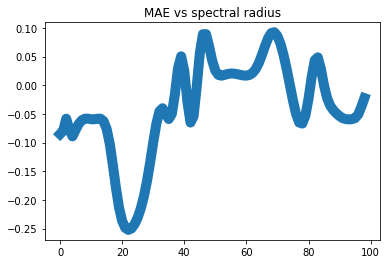

84
[]


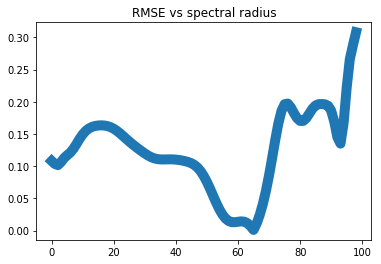

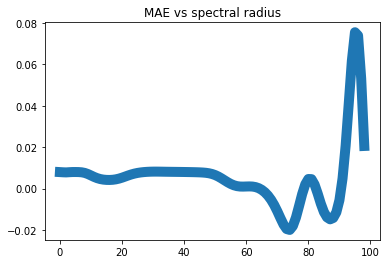

85
[]


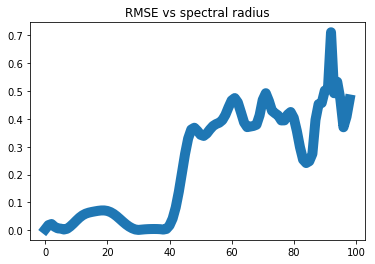

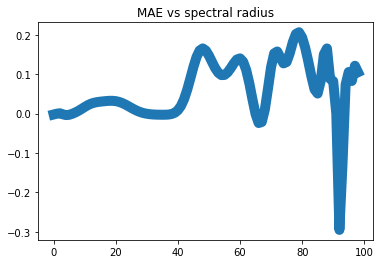

86
[]


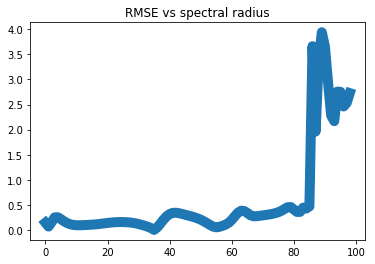

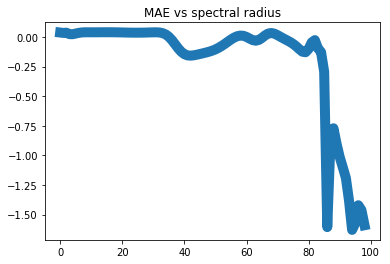

87
[]


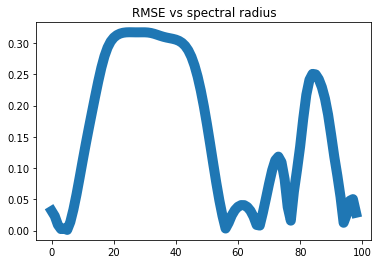

88
[]


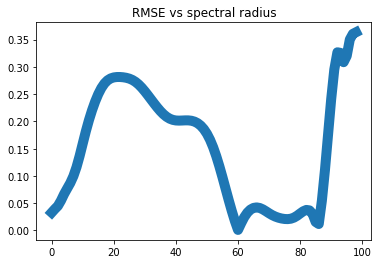

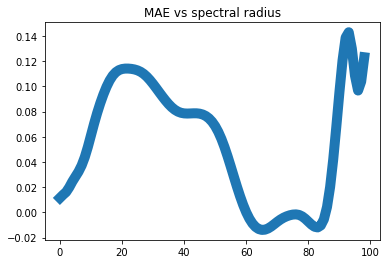

89
[]


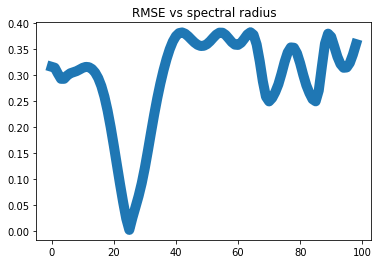

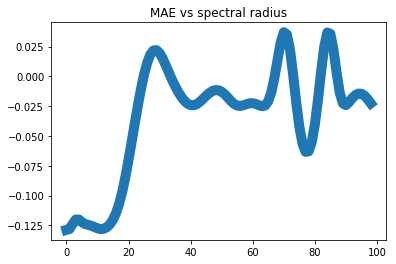

90
[]


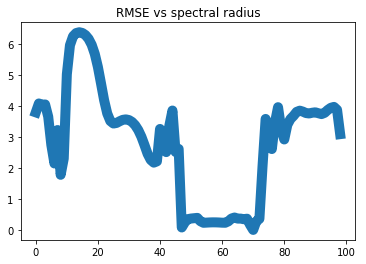

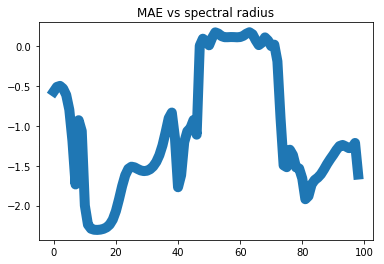

91
[]


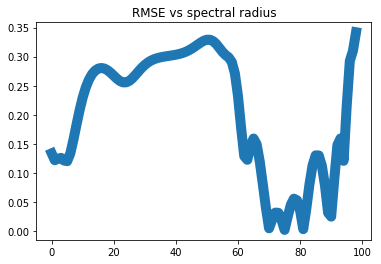

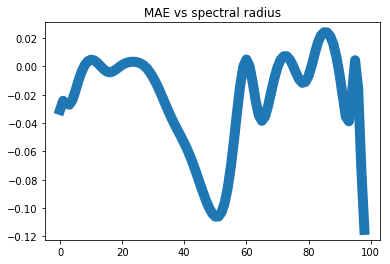

92
[]


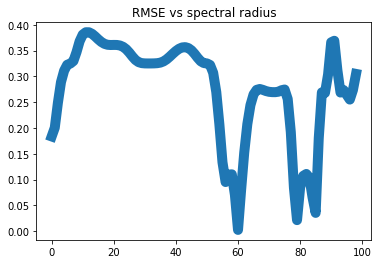

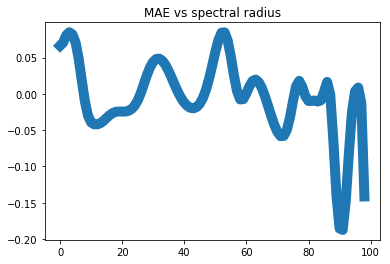

93
[]


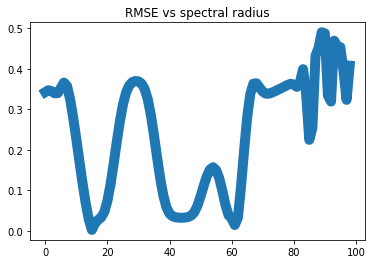

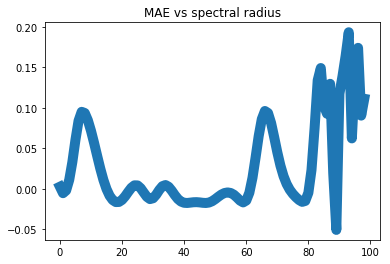

94
[]


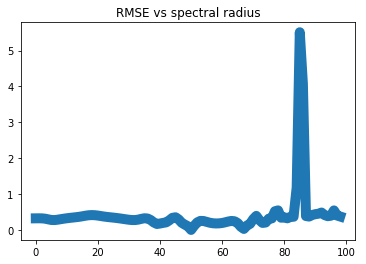

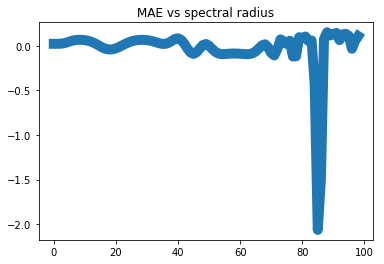

95
[]


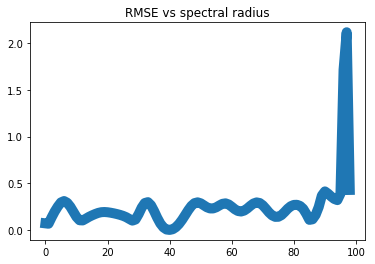

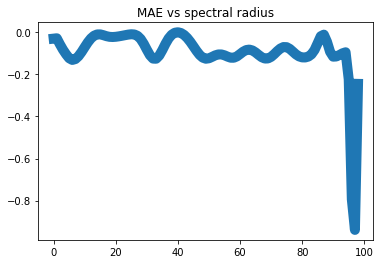

96
[]


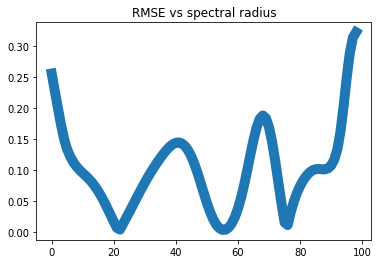

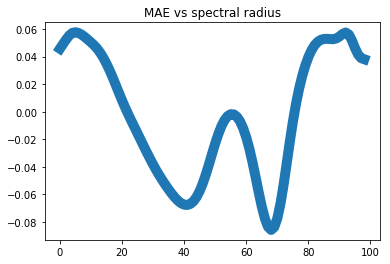

97
[]


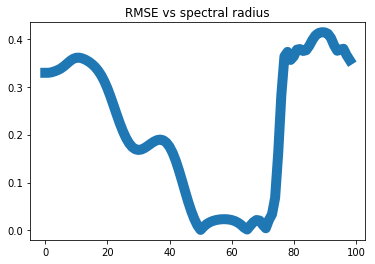

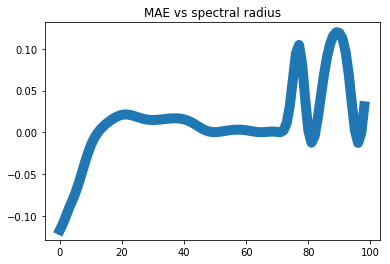

98
[]


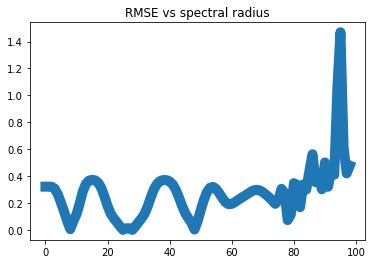

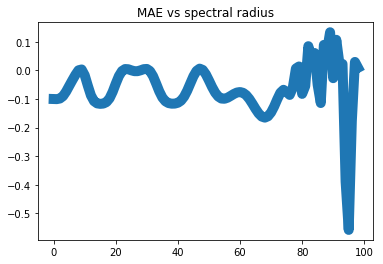

99
[]


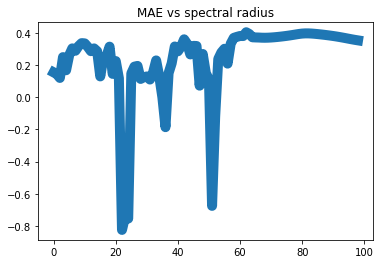

100
[]


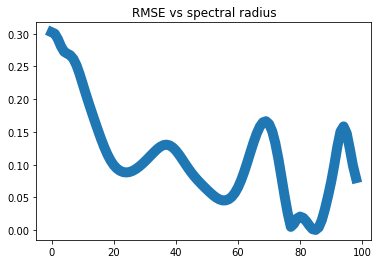

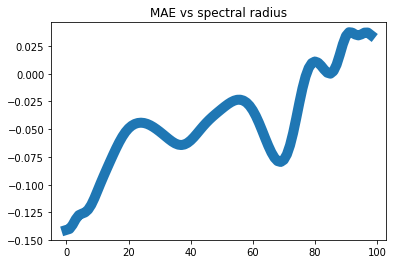

101
[]


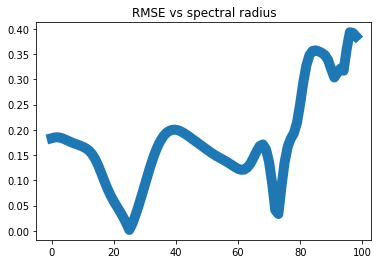

102
[]


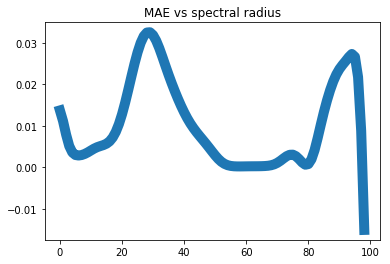

103
[]


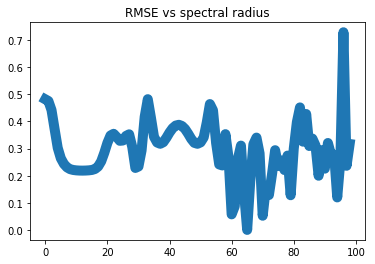

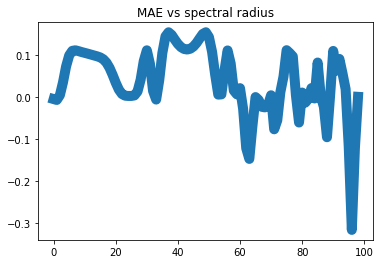

104
[]


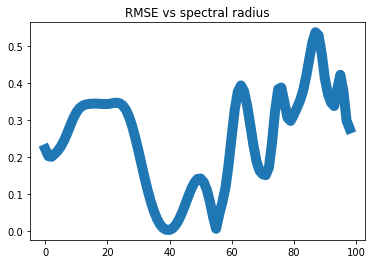

105
[]


106
[]


107
[]


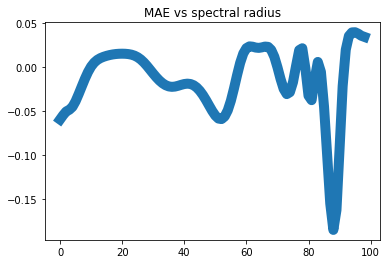

108
[]


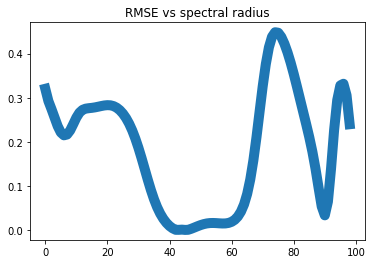

109
[]


110
[]


111
[]


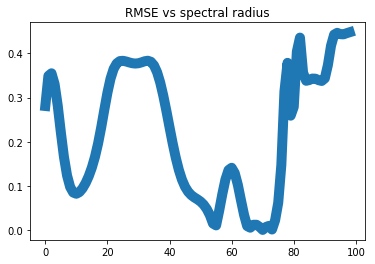

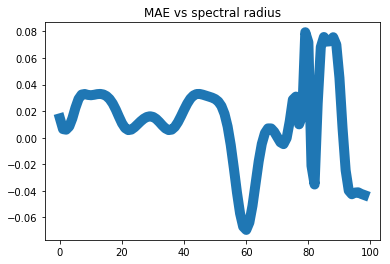

112
[]


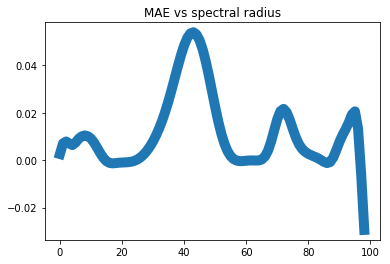

113
[]


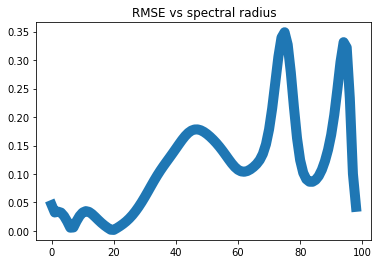

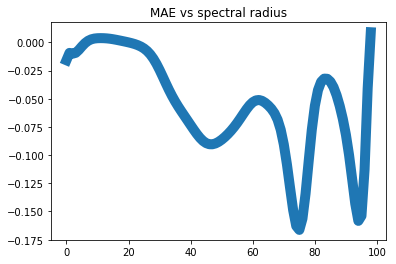

114
[]


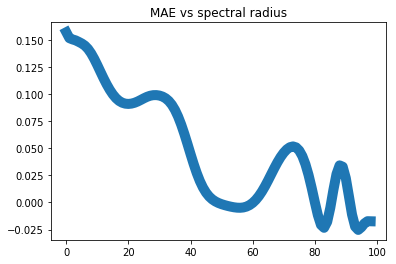

115
[]


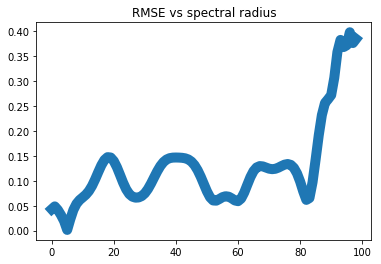

116
[]


117
[]


118
[]


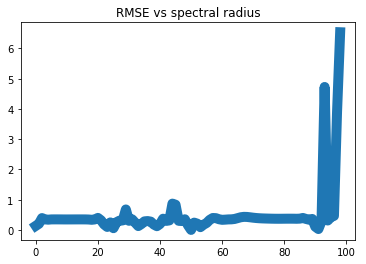

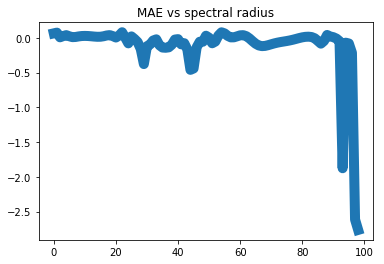

119
[]


120
[]


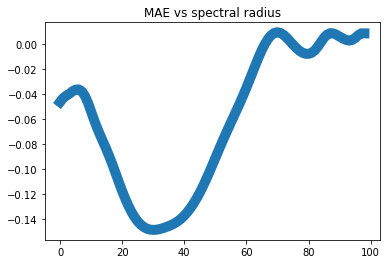

121
[]


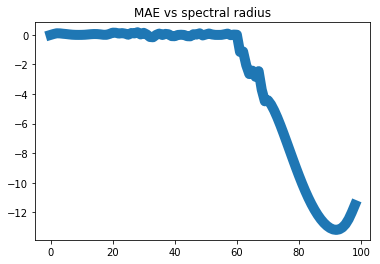

122
[]


123
[]


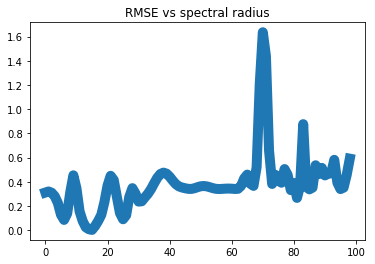

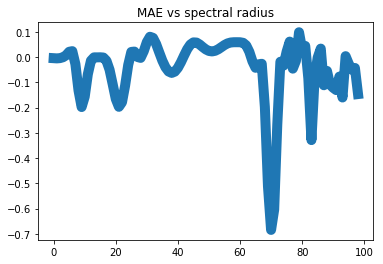

124


KeyboardInterrupt: 

In [1]:
import numpy as np
from pyESN import ESN
from matplotlib import pyplot as plt
import random

def get_data(x0):
    r = 4
    x = []
    x.append(x0)
    for i in range(1,1100):
        x1=x0*r*(1-x0)
        x0=x1
        x.append(x1)
    x=np.asarray(x)
    return(x)

def plot_sr(n,data):
    
    sr=0.01
    MAE = []
    RMSE = []
    while sr < 1:
        
        esn = ESN(n_inputs = 1,
              n_outputs = 1,
              n_reservoir = int(n),
              spectral_radius = sr,
              random_state=42)
        trainlen = 1000
        future = 10
        pred_training = esn.fit(np.ones(trainlen),data[0:trainlen])

        
        prediction = esn.predict(np.ones(future))
        mae = np.sum(prediction.flatten() - data[trainlen:trainlen+future])/future
        rmse = np.sqrt(np.mean((prediction.flatten() - data[trainlen:trainlen+future])**2))
        RMSE.append(rmse)
        MAE.append(mae)
        


        sr = sr+ 0.01
        
    print(err)
    t=np.arange(len(RMSE))
    %matplotlib inline
    plt.title('RMSE vs spectral radius')
    plt.plot(t, RMSE,linewidth=10)
    plt.show()
    plt.title('MAE vs spectral radius')
    plt.plot(t, MAE,linewidth=10)
    plt.show()


list_of_x0 = np.loadtxt("esn_random_x0.1_r4.csv", delimiter=" ")

menor = np.zeros((4))

#para saber quantos ja tem salvos
file_tocount = np.loadtxt('esn_dif_minstable_r4_x0.1_d1000.csv',delimiter=",")
file_siz = file_tocount.shape[0]
print(file_siz)


for ii in range(file_siz,1000):
    data = get_data(list_of_x0[ii])
    erros2 = []
    n = 1

    while n<2000:
        sr = 0.01
        errors = []
        
        while sr < 1:
            err = []
            esn = ESN(n_inputs = 1,
              n_outputs = 1,
              n_reservoir = n,
              spectral_radius = sr,
              random_state=42)
            trainlen = 1000
            future = 10
            pred_training = esn.fit(np.ones(trainlen),data[0:trainlen])

           
            prediction = esn.predict(np.ones(future))
            error = np.sqrt(np.mean((prediction.flatten() - data[trainlen:trainlen+future])**2))
            
            errors.append(sr)
            errors.append(error)


            sr = sr+ 0.05

        erros = np.asarray(errors).reshape((int(len(errors)/2),2))

        i_min = erros[:,1].argmin()


        erros2.append(n)
        erros2.append(erros[i_min,0])
        erros2.append(erros[i_min,1])

        

        if n<100:
            n = n+1
        else:
            n = n+100

    
    t = int(len(erros2)/3)
    erros2 = np.asarray(erros2).reshape(t,3)
    i_min = erros2[:,2].argmin()
    menor[0] = list_of_x0[ii]
    menor[1] = erros2[i_min,0]
    menor[2] = erros2[i_min,1]
    menor[3] = erros2[i_min,2]

    print(ii)
    plot_sr(menor[1],data)

    file2 = open('esn_dif_minstable_r4_x0.1_d1000.csv','a+')
    for j in range(menor.shape[0]):
        file2.write('{}'.format(menor[j]))
        if j<menor.shape[0]-1:
            file2.write(',')
    file2.write('\n')
    file2.close()
